In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from matplotlib import pyplot
from pandas import DataFrame

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# importing dataset
# create matrix of independent variables(features)
data_X = pd.read_csv('svm_train.csv')
X_train = data_X.iloc[:,0:2].values
#create dependent variable vector
data_y = pd.read_csv('svm_train.csv')
y_train = data_y.iloc[:, -1].values
# create matrix of independent variables(features)
data_Xtst = pd.read_csv('svm_test.csv')
X_test = data_Xtst.iloc[:,0:2].values
#create dependent variable vector
data_ytst = pd.read_csv('svm_test.csv')
y_test = data_ytst.iloc[:, -1].values

In [5]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
x1       160 non-null float64
x2       160 non-null float64
label    160 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.8 KB


In [6]:
data_X.head()

,x1,x2,label
0,1.214648,0.039655,0
1,1.409678,-0.374418,1
2,0.006408,0.867453,0
3,1.397605,-0.635747,1
4,1.821173,-0.348396,1


In [7]:
data_X.describe()

,x1,x2,label
count,160.000000,160.000000,160.000000
mean,0.568255,0.232501,0.531250
std,0.845854,0.512989,0.500589
min,-1.158266,-0.753338,0.000000
25%,-0.030709,-0.233028,0.000000
50%,0.618217,0.236040,1.000000
75%,1.129037,0.718274,1.000000
max,2.365365,1.126254,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe929eddd30>,
      dtype=object)

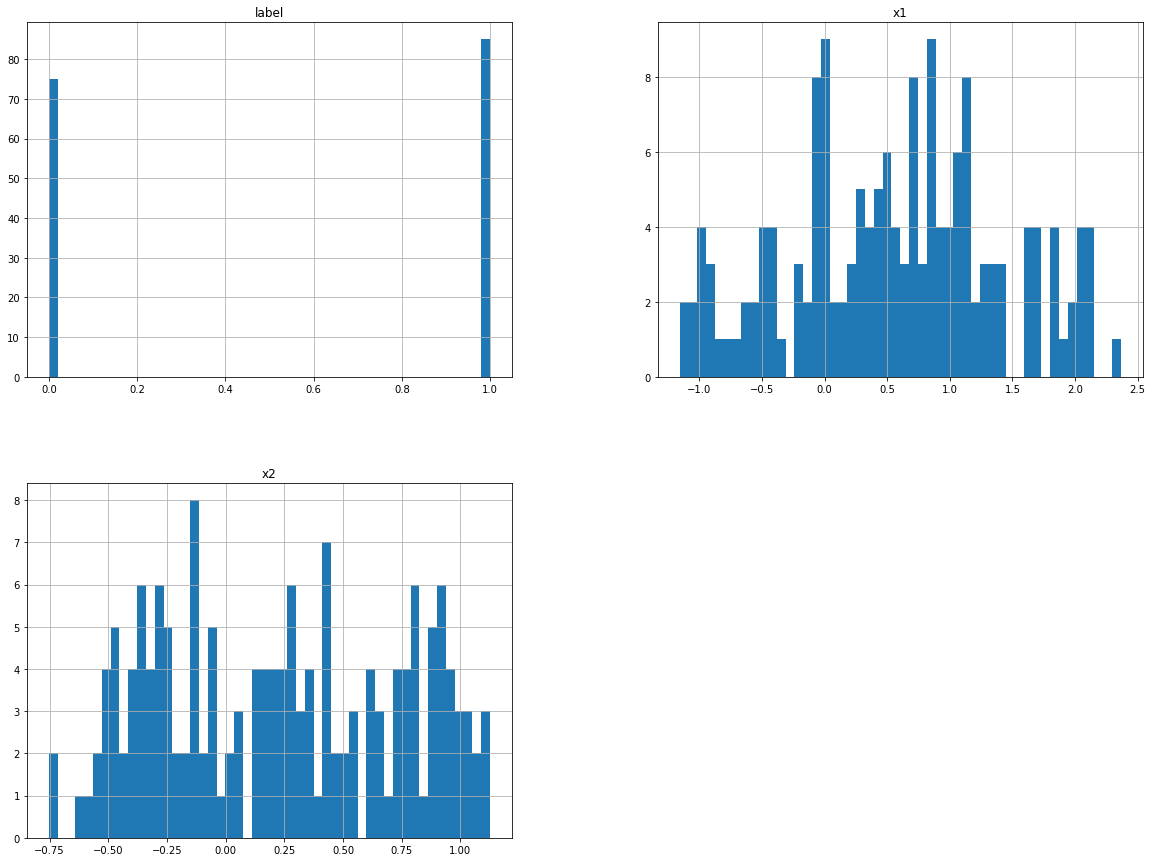

In [8]:
%matplotlib inline
import matplotlib as plt
data_X.hist(bins=50, figsize=(20,15))

In [9]:
from matplotlib import pyplot


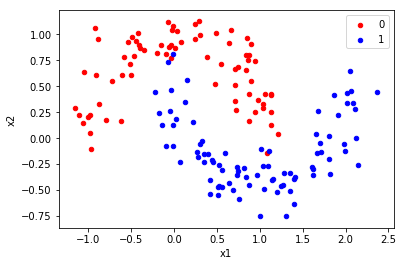

In [10]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x1=X_train[:,0], x2=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1953)

In [12]:
svm_class = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge"))
])

In [13]:
svm_class.fit(X_train, y_train)

/home/brandon/git/ecen-489-500/venv/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [14]:
#predicting Test set results
y_pred = svm_class.predict(X_val)
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [15]:
cm

array([[17,  0],
       [ 3, 20]])

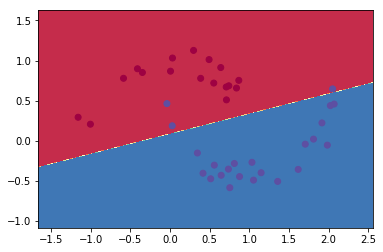

In [16]:
# Set min and max values and give it some padding
x_min, x_max = X_val[:, 0].min() - .5, X_val[:, 0].max() + .5
y_min, y_max = X_val[:, 1].min() - .5, X_val[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = svm_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Spectral)
pyplot.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=pyplot.cm.Spectral)
pyplot.savefig('svm_linear.png')

In [17]:
svm_class = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_svc", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
svm_class.fit(X_train, y_train)
#predicting Test set results
y_pred = svm_class.predict(X_val)
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [18]:
cm

array([[17,  0],
       [ 0, 23]])

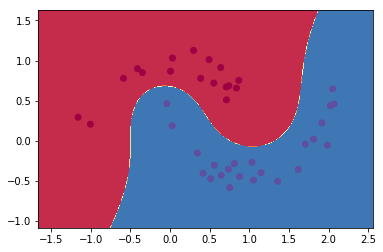

In [19]:
# Set min and max values and give it some padding
x_min, x_max = X_val[:, 0].min() - .5, X_val[:, 0].max() + .5
y_min, y_max = X_val[:, 1].min() - .5, X_val[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = svm_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Spectral)
# Original:
pyplot.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=pyplot.cm.Spectral)
# Checking on training data.
# pyplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=pyplot.cm.Spectral)
pyplot.savefig('svm_poly3.png')

In [20]:
svm_class = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_svc", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
svm_class.fit(X_train, y_train)
#predicting Test set results
y_pred = svm_class.predict(X_val)
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [21]:
cm

array([[16,  1],
       [ 0, 23]])

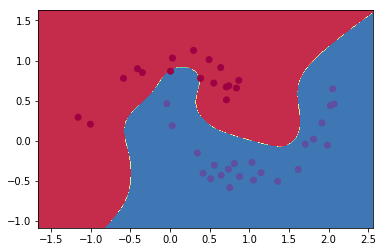

In [22]:
# Set min and max values and give it some padding
x_min, x_max = X_val[:, 0].min() - .5, X_val[:, 0].max() + .5
y_min, y_max = X_val[:, 1].min() - .5, X_val[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = svm_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Spectral)
# Original:
pyplot.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=pyplot.cm.Spectral)
# Checking training:
# pyplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=pyplot.cm.Spectral)
pyplot.savefig('svm_poly10.png')

In [23]:
from sklearn.model_selection import GridSearchCV
hp_grid=[
    {'C' : [0.001, 1, 1000], 'gamma' : [0.1, 0.7, 5]}
]
svm_classifier = SVC(kernel="rbf")
grid_search = GridSearchCV(svm_classifier, hp_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/home/brandon/git/ecen-489-500/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 1, 1000], 'gamma': [0.1, 0.7, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
grid_search.best_params_

{'C': 1, 'gamma': 5}

In [25]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svm_class = Pipeline([
    ("scaler", StandardScaler()),
    ("kern_svc", grid_search.best_estimator_)
])
svm_class.fit(X_train, y_train)
#predicting Test set results
y_pred = svm_class.predict(X_val)
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [27]:
cm

array([[17,  0],
       [ 0, 23]])

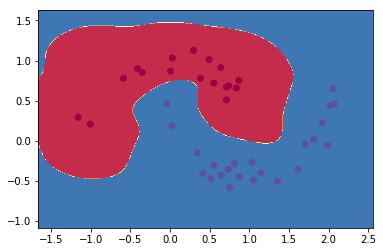

In [28]:
## Set min and max values and give it some padding
x_min, x_max = X_val[:, 0].min() - .5, X_val[:, 0].max() + .5
y_min, y_max = X_val[:, 1].min() - .5, X_val[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = svm_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Spectral)
pyplot.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=pyplot.cm.Spectral)
pyplot.savefig('svm_kernel.png')

In [29]:
#predicting Test set results
y_pred = svm_class.predict(X_test)
# making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[24,  1],
       [ 0, 15]])

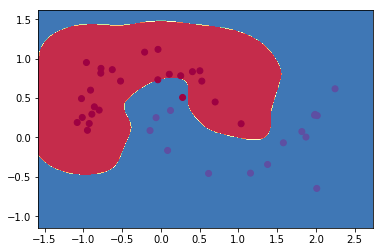

In [31]:
# Set min and max values and give it some padding
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = svm_class.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=pyplot.cm.Spectral)
pyplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=pyplot.cm.Spectral)
pyplot.savefig('svm_kernel_test.png')